In [ ]:
Author:MD Ruhul Amin
#Pre-processing steps:
-Read dataset
-find out missing values
Here, there is no missing values.
-find out data types
Here, all of data are in numerical form except 3 features (proto, service and state). 
-Encoding 
Here, One hot encoding is used which transforms categorical features into numerical. At first it does label encoding. 
label encoding example: 
    fruits
    Apple
    Orange
    Grape
Here in fruit column , there are 3 categories. Label encoder simple encode into 1,2,3. 
Label encoder:
    fruits
    1
    2
    3
BUt , this creates ranking and is not useful so one hot encoding is applied after this step.
One hot encoding:
    1: 0 0 1
    2: 0 1 0
    3: 1 0 0 
It adds more column and is seen as:
    fruit_grape fruit_orange fruit_apple
    0                 0           1
    0                 1           0
    1                 0           0
here, one fruit category column is changed into 3 columns by one hot encoding.
NUmber of new columns depend on unique category in each column.
In this case, there are 131,7,13 unique category in proto, state, service. 
Therefore, after one hot encoding, our feature size increased. 
We can further use feature dimension reduction techniques to extract important features and do same pre-processing for test dataset.

-FInally, correlation between features is shown in form of heatmap.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('training.csv')
df.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [3]:
df.shape


(82332, 45)

In [4]:
df.isnull().any().sum() #to check null values

0

In [5]:
All = df.shape[0]
Attack= df[df['label'] == 1]
NonAttack = df[df['label'] == 0]

x = len(Attack)/All
y = len(NonAttack)/All

print('Attacks :',x*100,'%')
print('Non attaks :',y*100,'%')

Attacks : 55.06000097167566 %
Non attaks : 44.939999028324344 %


Text(0,0.5,'Frequency')

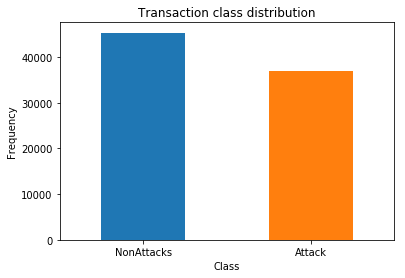

In [6]:
labels = ['NonAttacks','Attack']
classes = pd.value_counts(df['label'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
df.dtypes #checking if there is categorical data. we need to convert it into numerical

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [8]:
#proto #service #state 
#dropping attack_cats since we have label . and we are doing binary classification


In [9]:
df.drop(columns='attack_cat', inplace = True )

In [10]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,2,1,3,0,0,0,2,3,0,0


In [11]:
#changing categorical to numerical 
#encoding


In [12]:
df['proto'].unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [13]:
df['state'].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

In [14]:
df['service'].unique()

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [15]:
df['proto'].nunique()

131

In [16]:
df['state'].nunique()

7

In [17]:
df['service'].nunique()

13

In [18]:
#we are concerned with nominal and ordinal data. 
#why I chose one hot encodeing over label encoder? 


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from numpy import array

In [20]:

le_service = LabelEncoder()
le_proto = LabelEncoder()
le_state= LabelEncoder()
df['service_encoded'] = le_service.fit_transform(df.service)
df['proto_encoded'] = le_proto.fit_transform(df.proto)
df['state_encoded'] = le_state.fit_transform(df.state)

service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()
X = service_.fit_transform(df.service_encoded.values.reshape(-1,1)).toarray()
Xm = proto_.fit_transform(df.proto_encoded.values.reshape(-1,1)).toarray()
Xmm = state_.fit_transform(df.state_encoded.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["service_"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(Xm, columns = ["proto_"+str(int(i)) for i in range(Xm.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(Xmm, columns = ["state_"+str(int(i)) for i in range(Xmm.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)

In [22]:

df.drop(columns=['proto','service','state'], inplace = True )



In [45]:
df.dtypes

id                     int64
dur                  float64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
                      ...   
proto_108            float64
proto_109            float64
proto_110            float64
proto_111     

In [24]:
#converted all categorical to numerical with one HOT encoding. 

In [25]:
import seaborn as sns

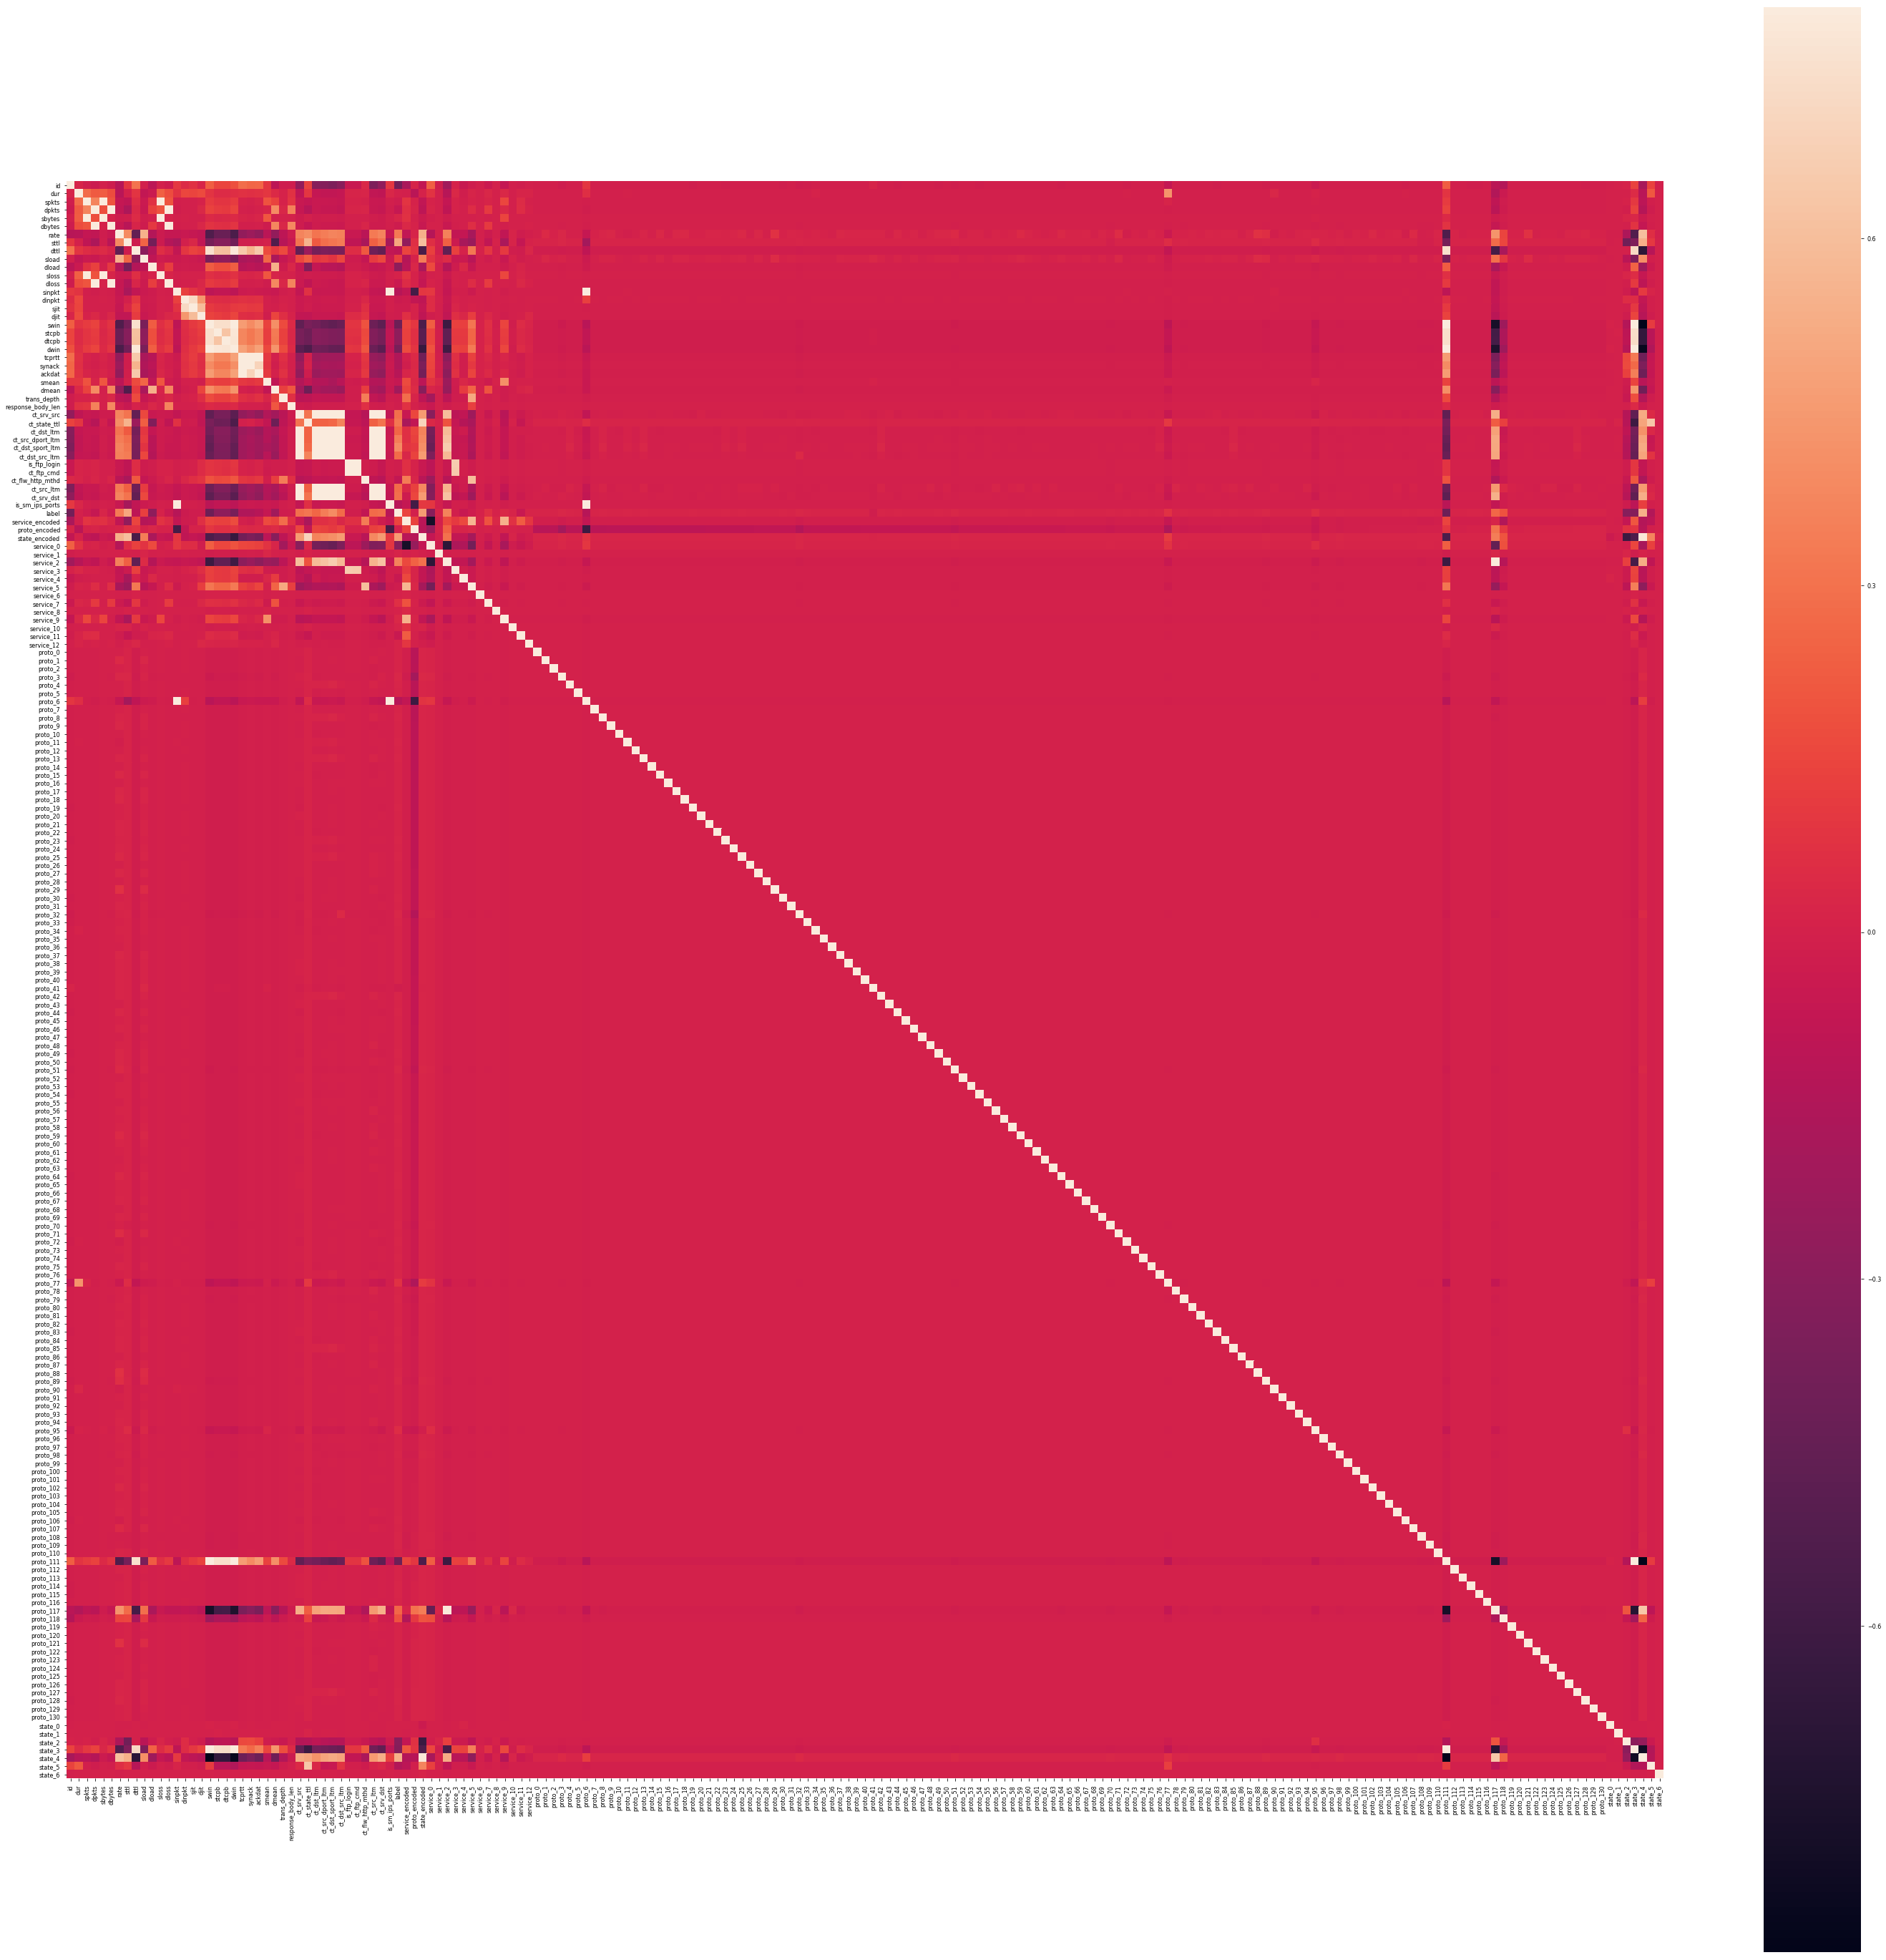

In [46]:
#correlation between features including encoded ones 
correlation_matrix = df.corr()
sns.set_context("paper")
fig = plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()


In [ ]:

#correlation between features excluding encoded ones 

In [43]:
d = df.iloc[:,0:41].corr()

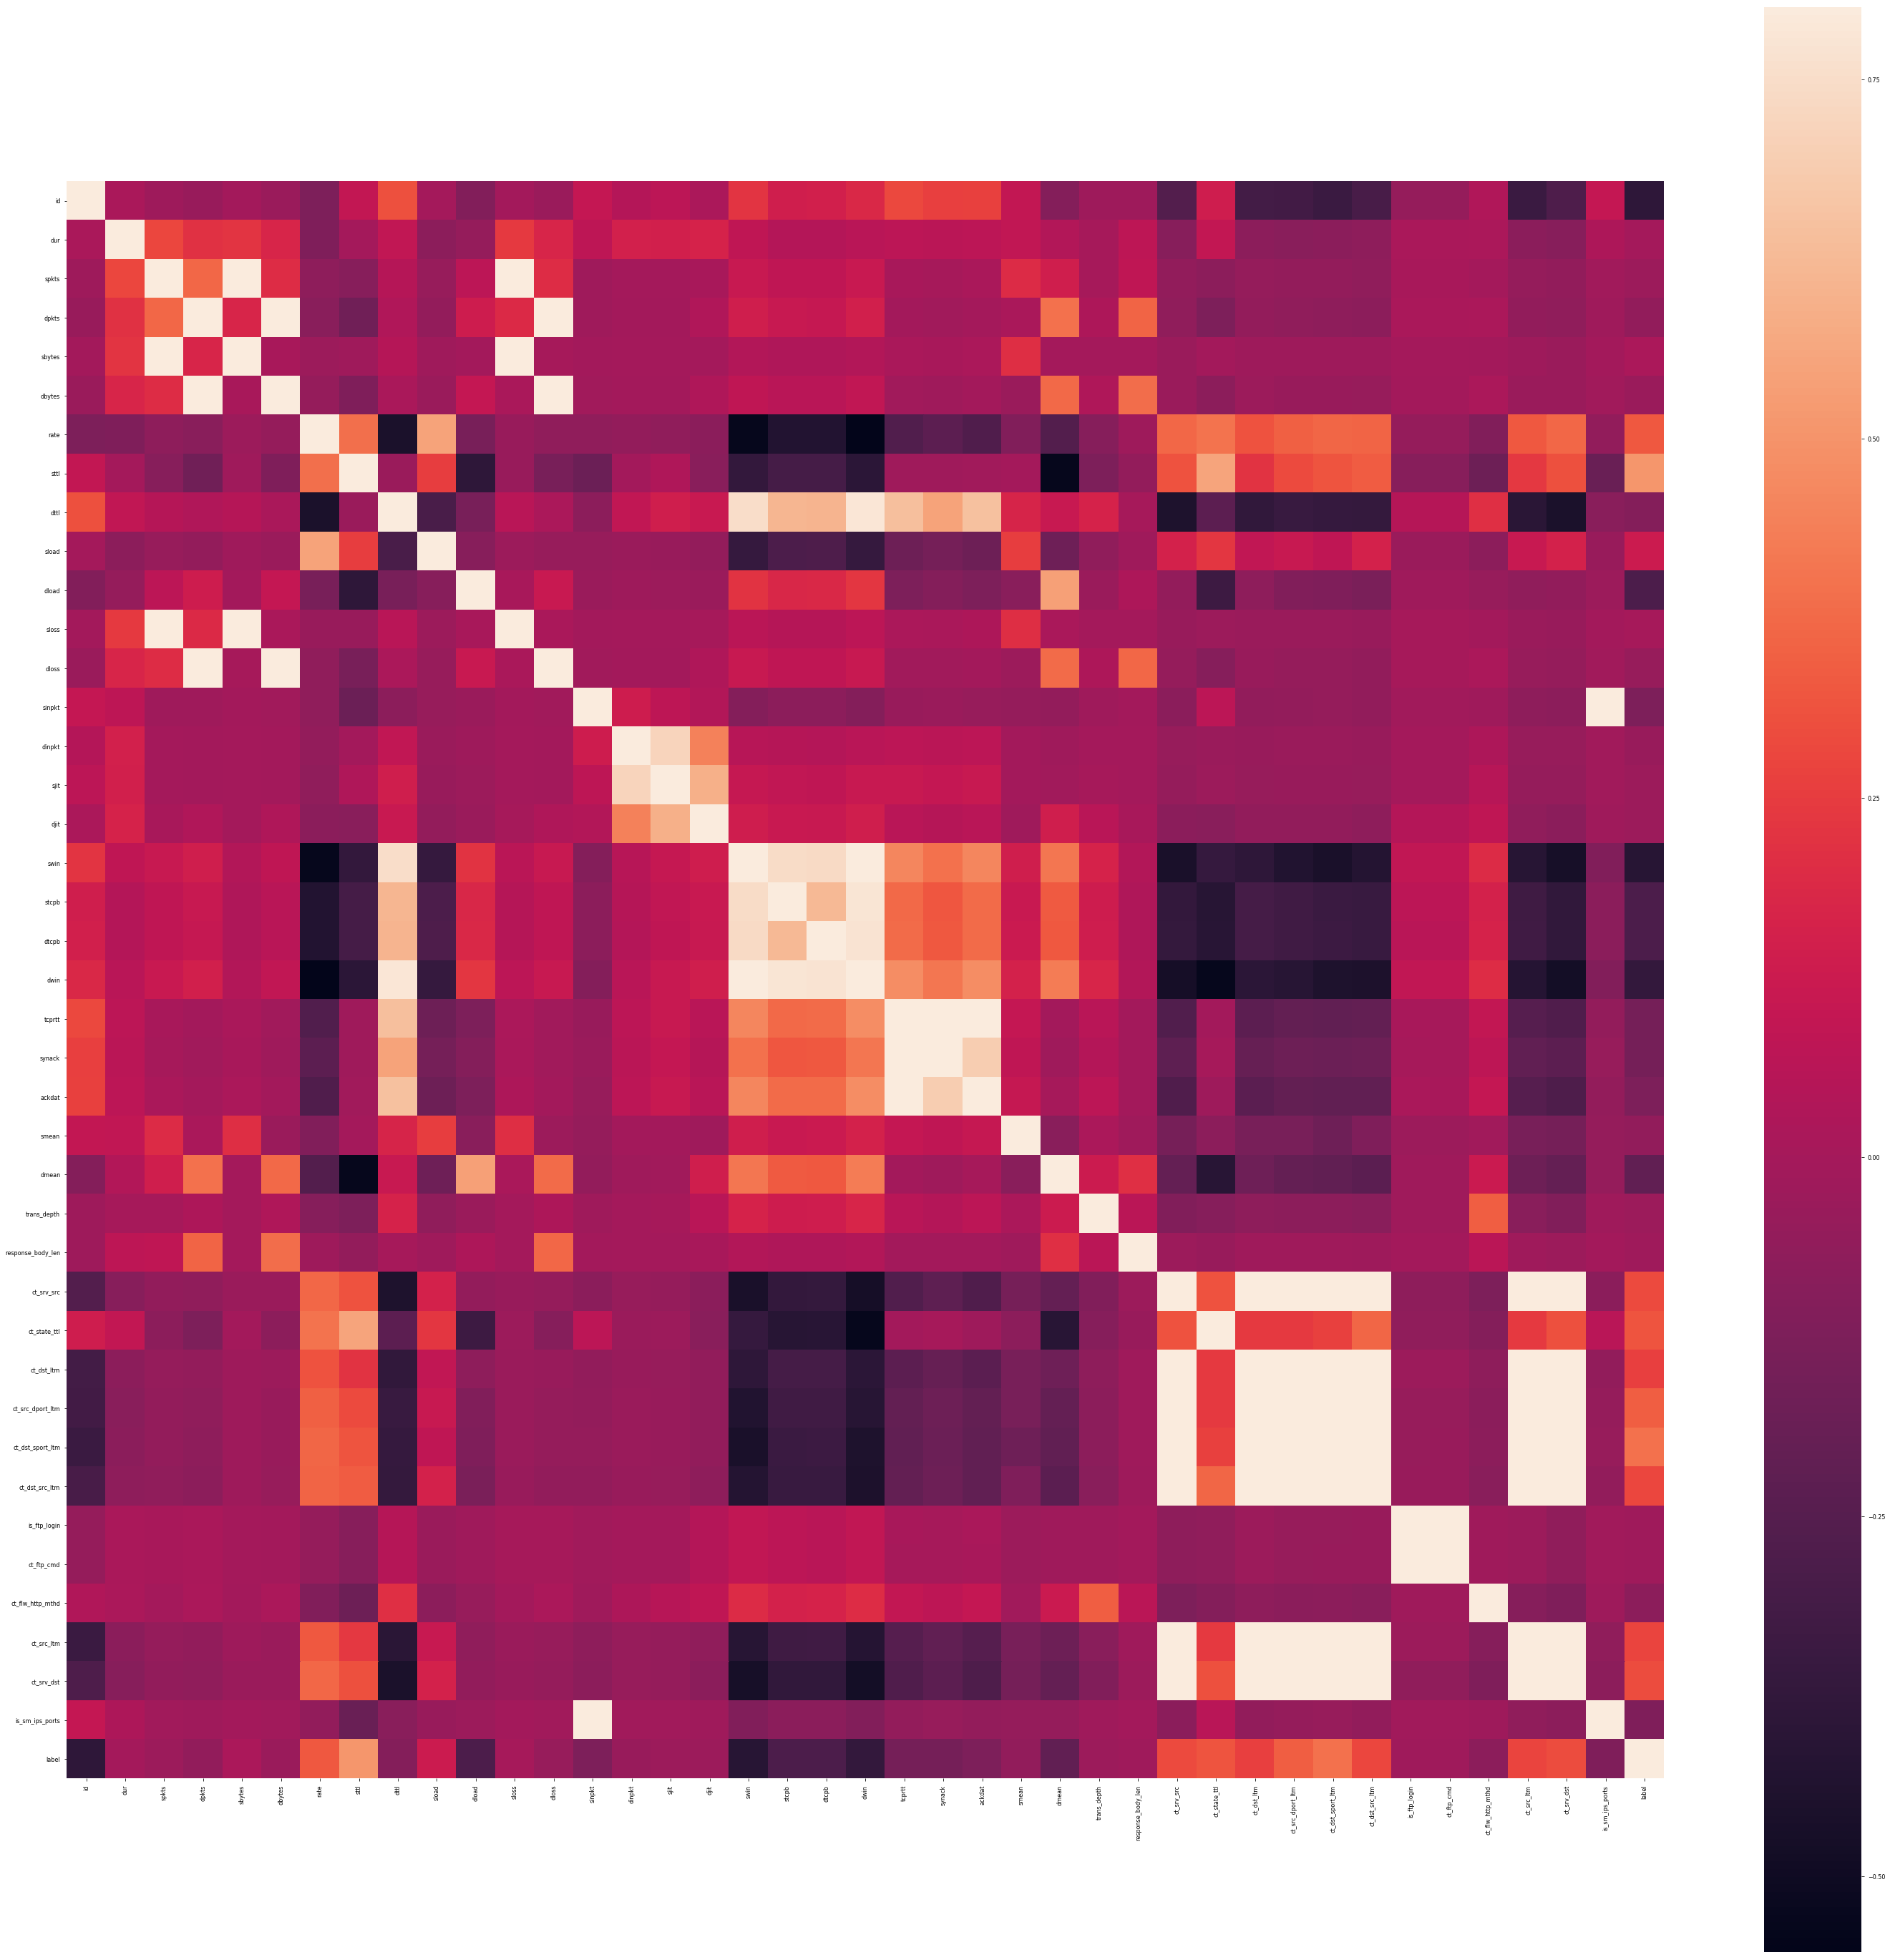

In [44]:
sns.set_context("paper")
fig = plt.figure(figsize=(50,50))
sns.heatmap(d,vmax=0.8,square = True)
plt.show()